# Capstone Project: Exploring the Android App Market on Google Play
---
DA Team 11, Mouhamad Ibrahim & Rashad Al-Aych


**Objective:** This project delves into a comprehensive analysis of the Android app market by examining over ten thousand apps available on Google Play across various categories. The goal of this analysis is to provide insights to android application developers about the trends in the android market and help them in creating more successful applications.




### Setup
In this part, set up the environment by importing the necessary libraries and having everything ready.

In [ ]:
# Import the necessary libraries
install.packages("dplyr")
install.packages("readr")
install.packages("stringr")
install.packages("tidyr")
install.packages("corrplot")

library(corrplot)
library(dplyr)
library(readr)
library(stringr)
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Part 1:  Data Collection and Understanding
1.1. Load the Google Play Store dataset into the google colab environment.



In [ ]:
# Load the datasets
apps_df <- read.csv('/content/apps.csv')
user_reviews_df <- read.csv('/content/user_reviews.csv')

1.2. Initial overview and gain a thorough understanding of the dataset's structure, encompassing the 'apps.csv' and 'user_reviews.csv' files.

In [ ]:
# Discover the  apps_df dataset
# Display the first few rows of the 'apps_df' data frame
cat('\033[1m"apps" dataset:\n\n')
head(apps_df)
cat('\n')

# Provide information about the structure of the 'apps_df' data frame
str(apps_df)
cat('\n')

# Generate summary statistics for the 'apps_df' data frame
summary(apps_df)
cat('\n')

# Discover the user_reviews_df dataset
# Display the first few rows of the 'user_reviews_df' data frame
cat('\033[1m"user_reviews" dataset:\n\n')
head(user_reviews_df)
cat('\n')

# Provide information about the structure of the 'user_reviews_df' data frame
str(user_reviews_df)
cat('\n')

# Generate summary statistics for the 'user_reviews_df' data frame
summary(user_reviews_df)

"apps" dataset:



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
3,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
5,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
6,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up



'data.frame':	10841 obs. of  13 variables:
 $ App           : chr  "Photo Editor & Candy Camera & Grid & ScrapBook" "Coloring book moana" "U Launcher Lite – FREE Live Cool Themes, Hide Apps" "Sketch - Draw & Paint" ...
 $ Category      : chr  "ART_AND_DESIGN" "ART_AND_DESIGN" "ART_AND_DESIGN" "ART_AND_DESIGN" ...
 $ Rating        : num  4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.1 4.4 4.7 ...
 $ Reviews       : chr  "159" "967" "87510" "215644" ...
 $ Size          : chr  "19M" "14M" "8.7M" "25M" ...
 $ Installs      : chr  "10,000+" "500,000+" "5,000,000+" "50,000,000+" ...
 $ Type          : chr  "Free" "Free" "Free" "Free" ...
 $ Price         : chr  "0" "0" "0" "0" ...
 $ Content.Rating: chr  "Everyone" "Everyone" "Everyone" "Teen" ...
 $ Genres        : chr  "Art & Design" "Art & Design;Pretend Play" "Art & Design" "Art & Design" ...
 $ Last.Updated  : chr  "07-Jan-18" "15-Jan-18" "01-Aug-18" "08-Jun-18" ...
 $ Current.Ver   : chr  "1.0.0" "2.0.0" "1.2.4" "Varies with device" ...
 $ Android.V

     App              Category             Rating         Reviews         
 Length:10841       Length:10841       Min.   : 1.000   Length:10841      
 Class :character   Class :character   1st Qu.: 4.000   Class :character  
 Mode  :character   Mode  :character   Median : 4.300   Mode  :character  
                                       Mean   : 4.193                     
                                       3rd Qu.: 4.500                     
                                       Max.   :19.000                     
                                       NA's   :1474                       
     Size             Installs             Type              Price          
 Length:10841       Length:10841       Length:10841       Length:10841      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
               


"user_reviews" dataset:



,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.5333333
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.2884615
3,10 Best Foods for You,nan,nan,NaN,NaN
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.8750000
5,10 Best Foods for You,Best idea us,Positive,1.00,0.3000000
6,10 Best Foods for You,Best way,Positive,1.00,0.3000000



'data.frame':	64295 obs. of  5 variables:
 $ App                   : chr  "10 Best Foods for You" "10 Best Foods for You" "10 Best Foods for You" "10 Best Foods for You" ...
 $ Translated_Review     : chr  "I like eat delicious food. That's I'm cooking food myself, case \"10 Best Foods\" helps lot, also \"Best Before (Shelf Life)\"" "This help eating healthy exercise regular basis" "nan" "Works great especially going grocery store" ...
 $ Sentiment             : chr  "Positive" "Positive" "nan" "Positive" ...
 $ Sentiment_Polarity    : num  1 0.25 NaN 0.4 1 1 0.6 NaN 0 0 ...
 $ Sentiment_Subjectivity: num  0.533 0.288 NaN 0.875 0.3 ...



     App            Translated_Review   Sentiment         Sentiment_Polarity
 Length:64295       Length:64295       Length:64295       Min.   :-1.000    
 Class :character   Class :character   Class :character   1st Qu.: 0.000    
 Mode  :character   Mode  :character   Mode  :character   Median : 0.150    
                                                          Mean   : 0.182    
                                                          3rd Qu.: 0.400    
                                                          Max.   : 1.000    
                                                          NA's   :26863     
 Sentiment_Subjectivity
 Min.   :0.000         
 1st Qu.:0.357         
 Median :0.514         
 Mean   :0.493         
 3rd Qu.:0.650         
 Max.   :1.000         
 NA's   :26863         

## Part 2: Data Cleaning and Preprocessing
2.1. Address issues related to missing data, duplicate entries, and outliers within the dataset.


In [ ]:
# 2.1 Addressing Issues:

# Handling Duplicate Entries:
# Display the number of rows of apps_df dataframe before removing duplicate
cat('The number of rows of apps_df before removing duplicates is:', nrow(apps_df))
cat('\n')

# Remove duplicate rows from apps_df based on all columns
apps_df <- distinct(apps_df)

# Display the number of rows of apps_df dataframe after removing duplicate
cat('The number of rows of apps_df after removing duplicates is:', nrow(apps_df))
cat('\n')

The number of rows of apps_df before removing duplicates is: 10841
The number of rows of apps_df after removing duplicates is: 10358


In [ ]:
# 2.1 Addressing Issues:

# Handling Duplicate Apps name:
## Order the data frame by Reviews in descending order
apps_df <- apps_df %>% arrange(desc(Reviews))

# Remove duplicate apps, keeping the one with the highest reviews
apps_df <- apps_df %>% distinct(App, .keep_all = TRUE)

In [ ]:
# 2.1 Addressing Issues:

# Handling outliers
# Adjust the number 1.9 in the category column
row_index <- which(apps_df$App == "Life Made WI-Fi Touchscreen Photo Frame")
apps_df[row_index, ]

# Check if the category value is numeric
if (apps_df[row_index,2] == "1.9")
{
  # moving the values inside the all category unless the name on cell to the right
  for (i in 13:4)
  {
    apps_df[row_index, i] = apps_df[row_index, i-1]
  }

  # Based On google play store, the category of the Life Made WI-Fi Touchscreen Photo Frame is "LifeStyle"
  apps_df[row_index, 3] = 1.9
  apps_df[row_index, 2] = "LIFESTYLE"
  apps_df[row_index, 10] = "LIFESTYLE"
  apps_df[row_index, ]
}

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4485,Life Made WI-Fi Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,0,Everyone,,11-Feb-18,1.0.19,4.0 and up,


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4485,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3.0M,"1,000+",Free,0,Everyone,LIFESTYLE,11-Feb-18,1.0.19,4.0 and up


In [ ]:
# 2.1 Addressing Issues:

# Handling Missing Data:
# Get the count of missing values for each column in apps_df
apps_column_missing <- colSums(is.na(apps_df) |
                               apps_df == "NAN" |
                               apps_df == "NaN" |
                               apps_df == "nan" |
                               apps_df == "" )

# Display the count of missing values for each column in apps_df
cat('Number of missing data in apps_df:\n\n')
apps_column_missing
cat('\n')

# Get the count of missing values for each column in user_reviews_df
users_column_missing <- colSums(is.na(user_reviews_df) |
                                user_reviews_df == "NAN" |
                                user_reviews_df == "NaN" |
                                user_reviews_df == "nan" |
                                user_reviews_df == ""  )

# Display the count of missing values for each column in user_reviews_df
cat('Number of missing data in user_reviews_df:\n\n')
users_column_missing


Number of missing data in apps_df:



App       Category         Rating        Reviews           Size 
             0              0           1463              0              0 
      Installs           Type          Price Content.Rating         Genres 
             0              1              0              0              0 
  Last.Updated    Current.Ver    Android.Ver 
             0              8              2


Number of missing data in user_reviews_df:



App      Translated_Review              Sentiment 
                     0                  26868                  26863 
    Sentiment_Polarity Sentiment_Subjectivity 
                 26863                  26863

After investigating the missing values in "Rating" column in the apps_df, we find that 1463 rows is a significant amount. So we wil fill them with the mean of the rating grouped by genre. Concerning the missing values in other columns, the rows containing these values will be removed.

Concerning the missing values in the user_reviews_df, we find that almost column values are missed for a record containg missing translated review. So, we decided to remove the rows containing missing values.

In [ ]:
# this step is crucial before Handling missing values
# Split by ";" the 'Genres' column into two new columns 'Genre' and 'Subgenre'

# Displaying the unique values of the Genres column before splitting
cat('\033[1mUnique values of Genres column:\n\n')
unique_Genres<- unique(apps_df$Genres)
print(unique_Genres)
cat('\n')

# Divide the Genres column
if ("Genres" %in% names(apps_df))
{
  apps_df <- separate(apps_df, Genres, into = c("Genre", "Subgenre"), sep = ";", extra = "merge")
}

# Fill 'Subgenre' with 'Genre' if it is missing
apps_df$Subgenre <- ifelse(is.na(apps_df$Subgenre), apps_df$Genre, apps_df$Subgenre)

# Displaying the unique values of Genre and Subgenre
unique_genre <- unique(apps_df$Genre)
unique_subgenre <- unique(apps_df$Subgenre)

# Print the unique values
cat('\n\033[1mUnique values of Genre column:\n\n')
print(unique_genre)

cat('\n\033[1mUnique values of SubGenre column:\n\n')
print(unique_subgenre)
head(apps_df)


Unique values of Genres column:

  [1] "Sports"                               
  [2] "Tools"                                
  [3] "Shopping"                             
  [4] "Travel & Local"                       
  [5] "Entertainment"                        
  [6] "Video Players & Editors"              
  [7] "Communication"                        
  [8] "Comics"                               
  [9] "Arcade"                               
 [10] "Adventure"                            
 [11] "Medical"                              
 [12] "Auto & Vehicles"                      
 [13] "Productivity"                         
 [14] "Action"                               
 [15] "Education"                            
 [16] "Events"                               
 [17] "Parenting"                            
 [18] "Strategy"                             
 [19] "Casual"                               
 [20] "Photography"                          
 [21] "Lifestyle"                            
 

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 9265 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”



Unique values of Genre column:

 [1] "Sports"                  "Tools"                  
 [3] "Shopping"                "Travel & Local"         
 [5] "Entertainment"           "Video Players & Editors"
 [7] "Communication"           "Comics"                 
 [9] "Arcade"                  "Adventure"              
[11] "Medical"                 "Auto & Vehicles"        
[13] "Productivity"            "Action"                 
[15] "Education"               "Events"                 
[17] "Parenting"               "Strategy"               
[19] "Casual"                  "Photography"            
[21] "Lifestyle"               "Health & Fitness"       
[23] "Business"                "Simulation"             
[25] "Weather"                 "Personalization"        
[27] "Books & Reference"       "News & Magazines"       
[29] "Dating"                  "Art & Design"           
[31] "Board"                   "Puzzle"                 
[33] "Educational"             "Finance"               

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genre,Subgenre,Last.Updated,Current.Ver,Android.Ver
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,Sports,23-May-18,6.5,4.1 and up
2,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,Tools,17-Dec-13,3.2,2.2 and up
3,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,Shopping,22-Jan-18,1.4,4.3 and up
4,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,Sports,05-Jun-18,7.1,5.0 and up
5,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,Travel & Local,06-Aug-18,1.28.1,5.0 and up
6,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997,Varies with device,"100,000+",Free,0,Everyone,Entertainment,Entertainment,27-Jun-18,2.4,4.1 and up


In [ ]:
# 2.1 Addressing Issues:

# Handling Missing Data:
# Replace the null values in the rating column with the mean rating grouped by subgenre
  # Calculate mean rating by subgenre
  mean_rating_by_subgenres <- aggregate(Rating ~ Subgenre, data=apps_df, FUN=function(x) mean(x, na.rm=TRUE))

  # Name the columns appropriately
  colnames(mean_rating_by_subgenres) <- c("Subgenres", "Mean_Rating")

  # Find indices of NA values in 'Rating' column
  na_indices <- which(is.na(apps_df$Rating))

  # Match genres for each NA value to find corresponding mean subgenre
  matching_subgenres <- apps_df$Subgenre[na_indices]

  # create a vector of rating means for matched subgenres
  mean_ratings <- mean_rating_by_subgenres$Mean_Rating[match(matching_subgenres, mean_rating_by_subgenres$Subgenres, nomatch = NA)]

  # Replace NA values in 'Rating' with corresponding mean ratings
  apps_df$Rating[na_indices] <- mean_ratings

  # Check that the Rating does not contains NA value
  na_Rating_count <- sum(is.na(apps_df$Rating))

  # Print the initial count of NA values
  cat('The number of NA values in Rating column after replacing the NA values with the means is:', na_Rating_count)


The number of NA values in Rating column after replacing the NA values with the means is: 0

In [ ]:
# 2.1 Addressing Issues:

# Handling Missing Data:
# Remove rows with null values in apps_df
apps_df <- na.omit(apps_df)

# fill the NaN value in the Type column with free since the price of this app is 0
apps_df$Type <- ifelse(apps_df$Type == "NaN", "Free", apps_df$Type)

# Get the count of missing values for each column in apps_df after removal
apps_column_missing <- colSums(is.na(apps_df) |
                               apps_df == "NAN" |
                               apps_df == "NaN" |
                               apps_df == "nan" |
                               apps_df =="")

# Display the count of missing values for each column in apps_df after removal
cat('Number of missing data in apps_df:\n\n')
apps_column_missing
cat('\n')

# Remove rows with missing values in user_reviews_df
 user_reviews_df <- na.omit(user_reviews_df)

 # Remove rows with blank tranlated review
 user_reviews_df <- user_reviews_df[user_reviews_df$Translated_Review !="", ]

# Get the count of missing values for each column in user_reviews_df after removal
users_column_missing <- colSums(is.na(user_reviews_df) |
                                user_reviews_df == "NAN" |
                                user_reviews_df == "NaN" |
                                user_reviews_df == "nan" |
                                user_reviews_df == "")

# Display the count of missing values for each column in user_reviews_df after removal
cat('Number of missing data in user_reviews_df:\n\n')
users_column_missing

Number of missing data in apps_df:



App       Category         Rating        Reviews           Size 
             0              0              0              0              0 
      Installs           Type          Price Content.Rating          Genre 
             0              0              0              0              0 
      Subgenre   Last.Updated    Current.Ver    Android.Ver 
             0              0              8              2


Number of missing data in user_reviews_df:



App      Translated_Review              Sentiment 
                     0                      0                      0 
    Sentiment_Polarity Sentiment_Subjectivity 
                     0                      0

2.2. Standardize column names and rectify any inconsistencies.

In [ ]:
# Adjusting columns names
# Display the column names of apps_df
cat('\033[1mapps_df columns names:')
cat('\n\n')
colnames(apps_df)
cat('\n')

# Display the column names of user_reviews_df
cat('\033[1muser_reviews_df columns names:')
cat('\n\n')
colnames(user_reviews_df)
cat('\n')

# Replace "." with underscores in column names of apps_df
colnames(apps_df) <- gsub("\\.", "_", colnames(apps_df))

# Transform the app names into proper name
apps_df$App <- str_to_title(apps_df$App)

# Transform the category names into proper name
apps_df$Category <- str_to_title(apps_df$Category)

cat('\033[1mAfter standardizing:\n')

# Display the column names of apps_df
cat('\n\033[1mapps_df columns names:')
cat('\n\n')
colnames(apps_df)
cat('\n')

# Display the column names of user_reviews_df
cat('\033[1muser_reviews_df columns names:')
cat('\n\n')
colnames(user_reviews_df)
cat('\n')


apps_df columns names:



[1] "App"            "Category"       "Rating"         "Reviews"       
 [5] "Size"           "Installs"       "Type"           "Price"         
 [9] "Content.Rating" "Genre"          "Subgenre"       "Last.Updated"  
[13] "Current.Ver"    "Android.Ver"


user_reviews_df columns names:



[1] "App"                    "Translated_Review"      "Sentiment"             
[4] "Sentiment_Polarity"     "Sentiment_Subjectivity"


After standardizing:

apps_df columns names:



[1] "App"            "Category"       "Rating"         "Reviews"       
 [5] "Size"           "Installs"       "Type"           "Price"         
 [9] "Content_Rating" "Genre"          "Subgenre"       "Last_Updated"  
[13] "Current_Ver"    "Android_Ver"


user_reviews_df columns names:



[1] "App"                    "Translated_Review"      "Sentiment"             
[4] "Sentiment_Polarity"     "Sentiment_Subjectivity"

2.3. Remove extraneous or redundant information.

In [ ]:
# Remove current version column from the apps_df
if ("Current_Ver" %in% colnames(apps_df)) {
  apps_df <- apps_df %>% select(-Current_Ver)
} else {
  cat("\n\nCurrent_Ver column does not exist in the apps_df.")
}

# Remove android version column from the apps_df
if ("Android_Ver" %in% colnames(apps_df)) {
  apps_df <- apps_df %>% select(-Android_Ver)
} else {
  cat("\n\nAndroid_Ver column does not exist in the apps_df.")
}

# Display columns names after removing extra columns
cat('\n\nThe columns names of the apps_df after removing extra columns:')
cat('\n\n')
colnames(apps_df)



The columns names of the apps_df after removing extra columns:



[1] "App"            "Category"       "Rating"         "Reviews"       
 [5] "Size"           "Installs"       "Type"           "Price"         
 [9] "Content_Rating" "Genre"          "Subgenre"       "Last_Updated"

## Part 3: Correcting Data Types
Evaluate and adjust data types for each column, such as converting numeric values, dates, and text data as required.

In [ ]:
# Convert 'Reviews' column in apps_df to numeric

# Display the unique values of Reviews column before conversion
cat('\033[1mUnique values of Reviews column before conversion:\n\n')
print(unique(apps_df$Reviews))

# Conversion
apps_df$Reviews <- as.numeric(apps_df$Reviews)

# Display the unique values of Reviews column after conversion
cat('\n\033[1mUnique values of Reviews column after conversion:\n\n')
print(unique(apps_df$Reviews))


Unique values of Reviews column before conversion:

   [1] "9992"     "999"      "9975"     "9971"     "997"      "9966"    
   [7] "996"      "99559"    "9952"     "9951"     "995002"   "9950"    
  [13] "9945"     "9941"     "994"      "99290"    "992"      "9914"    
  [19] "990796"   "99020"    "990"      "99"       "9898"     "9895"    
  [25] "9894"     "989344"   "9888"     "9883806"  "9883367"  "98819"   
  [31] "9879473"  "98717"    "987"      "98585"    "9856"     "98509"   
  [37] "985"      "984451"   "98324"    "983"      "981995"   "98123"   
  [43] "981"      "980"      "98"       "979"      "97890"    "978"     
  [49] "9779"     "97702"    "97699"    "9765"     "975"      "974"     
  [55] "973270"   "972574"   "97209"    "9716"     "97071"    "9701"    
  [61] "970"      "97"       "9699"     "969"      "967"      "96658"   
  [67] "9663"     "9659"     "9653"     "9652"     "9643041"  "96419"   
  [73] "964"      "9636"     "963"      "9626"     "9612"     "961"     

In [ ]:
# Convert Installs column in apps_df to numeric

# Display the unique values of Installs column before conversion
cat('\033[1mUnique values of Installs column before conversion:\n\n')
print(unique(apps_df$Installs))

# Remove commas and plus signs from Installs, and convert to numeric
apps_df$Installs <- as.numeric(gsub("[+,]", "", apps_df$Installs))

# Display the unique values of Installs column after conversion
cat('\n\033[1mUnique values of Installs column after conversion:\n\n')
print(unique(apps_df$Installs))

Unique values of Installs column before conversion:

 [1] "1,000,000+"     "100,000+"       "500,000+"       "50,000+"       
 [5] "10,000,000+"    "5,000,000+"     "10,000+"        "50,000,000+"   
 [9] "100,000,000+"   "5,000+"         "1,000+"         "1,000,000,000+"
[13] "500+"           "10+"            "100+"           "50+"           
[17] "500,000,000+"   "5+"             "1+"             "0+"            
[21] "0"             

Unique values of Installs column after conversion:

 [1] 1e+06 1e+05 5e+05 5e+04 1e+07 5e+06 1e+04 5e+07 1e+08 5e+03 1e+03 1e+09
[13] 5e+02 1e+01 1e+02 5e+01 5e+08 5e+00 1e+00 0e+00


In [ ]:
# Convert Type column in apps_df into factor

# Display the unique values of Type column before conversion
cat('\033[1mUnique values of Type column before conversion:\n\n')
print(unique(apps_df$Type))

# Conversion
apps_df$Type <- as.factor(apps_df$Type)

# Display the unique values of Type column after conversion
cat('\n\033[1mUnique values of Type column after conversion:\n\n')
print(unique(apps_df$Type))

Unique values of Type column before conversion:

[1] "Free" "Paid"

Unique values of Type column after conversion:

[1] Free Paid
Levels: Free Paid


In [ ]:
# Convert Price column in apps_df to numeric

# Display the unique values of Price column before conversion
cat('\033[1mUnique values of Price column before conversion:\n\n')
print(unique(apps_df$Price))

# Remove dollar signs from Price column and convert to numeric
apps_df$Price <- as.numeric(gsub("[$]", "", apps_df$Price))

# Display the unique values of Price column after conversion
cat('\n\033[1mUnique values of Price column after conversion:\n\n')
print(unique(apps_df$Price))

Unique values of Price column before conversion:

 [1] "0"        "$2.49 "   "$2.99 "   "$0.99 "   "$3.99 "   "$4.99 "  
 [7] "$399.99 " "$1.99 "   "$79.99 "  "$7.49 "   "$4.49 "   "$9.99 "  
[13] "$5.99 "   "$13.99 "  "$4.29 "   "$1.70 "   "$14.99 "  "$12.99 " 
[19] "$1.49 "   "$19.99 "  "$1.50 "   "$3.49 "   "$1.29 "   "$7.99 "  
[25] "$29.99 "  "$1.59 "   "$11.99 "  "$39.99 "  "$3.02 "   "$89.99 " 
[31] "$6.99 "   "$2.90 "   "$1.00 "   "$19.40 "  "$5.49 "   "$5.00 "  
[37] "$1.75 "   "$8.99 "   "$3.08 "   "$18.99 "  "$299.99 " "$17.99 " 
[43] "$379.99 " "$8.49 "   "$2.56 "   "$15.46 "  "$2.95 "   "$1.97 "  
[49] "$24.99 "  "$19.90 "  "$4.80 "   "$2.60 "   "$1.26 "   "$4.77 "  
[55] "$400.00 " "$16.99 "  "$10.99 "  "$4.59 "   "$389.99 " "$33.99 " 
[61] "$1.76 "   "$46.99 "  "$3.90 "   "$2.00 "   "$2.50 "   "$10.00 " 
[67] "$14.00 "  "$3.95 "   "$6.49 "   "$3.28 "   "$1.20 "   "$2.59 "  
[73] "$4.84 "   "$37.99 "  "$1.61 "   "$4.60 "   "$9.00 "   "$15.99 " 
[79] "$74.99 "  "$3.88 "   

In [ ]:
# Convert Content_Rating column in apps_df into factor

# Display the unique values of Content_Rating column before conversion
cat('\033[1mUnique values of Content_Rating column before conversion:\n\n')
print(unique(apps_df$Content_Rating))

# Convert Content_Rating column into factor
apps_df$Content_Rating <- as.factor(apps_df$Content_Rating)

# Display the unique values of Content_Rating column after conversion
cat('\n\033[1mUnique values of Content_Rating column after conversion:\n\n')
print(unique(apps_df$Content_Rating))

Unique values of Content_Rating column before conversion:

[1] "Everyone"        "Teen"            "Everyone 10+"    "Mature 17+"     
[5] "Adults only 18+" "Unrated"        

Unique values of Content_Rating column after conversion:

[1] Everyone        Teen            Everyone 10+    Mature 17+     
[5] Adults only 18+ Unrated        
Levels: Adults only 18+ Everyone Everyone 10+ Mature 17+ Teen Unrated


In [ ]:
# convert the size column in apps_df into numeric

  # Display the unique values of size column before conversion
  cat('\033[1mUnique values of size column before conversion:\n\n')
  print(unique(apps_df$Size))
  cat('\n')

  # Check if the type of the size column is character
    if(class(apps_df$Size) == "character")
    {
      # Extract numeric values and units from the "Size" column
      size_numeric = parse_number(apps_df$Size)
      size_units =  gsub("[^a-zA-Z]", "", apps_df$Size)

      # Convert units to a multiplier (1 MB = 1024 KB)
      size_multiplier <- ifelse(size_units == "M", 1, 1/1024)

      # Overwrite the existing "Size" column with the numeric values
      apps_df$Size <- size_numeric * size_multiplier
    }

# Replace the NA values in size by the mean of each Subgenre
  # Calculate mean size by Subgenre, excluding NA values
  mean_size_by_Subgenre <- aggregate(Size ~ Subgenre, data=apps_df, FUN=function(x) mean(x, na.rm=TRUE))

  # Name the columns appropriately
  colnames(mean_size_by_Subgenre) <- c("Subgenre", "Mean_Size")

  # Find indices of NA values in 'Size' column
  na_indices <- which(is.na(apps_df$Size))

  # Match Subgenres for each NA value to find corresponding mean size
  matching_subgenres <- apps_df$Subgenre[na_indices]

  # create a vector of sizes means for matched Subgenres
  mean_sizes <- mean_size_by_Subgenre$Mean_Size[match(matching_subgenres, mean_size_by_Subgenre$Subgenre, nomatch = NA)]

  # Replace NA values in 'Size' with corresponding mean sizes
  apps_df$Size[na_indices] <- mean_sizes

  # Check that the size does not contains NA value
  na_count <- sum(is.na(apps_df$Size))

  # Print the initial count of NA values
  cat('The number of NA values in Size column after replacing the NA values with the means is:', na_count)

  # If there are still NA values after replacing with means
  if(na_count !=0)
  {
    # Remove remaining NA values and specific strings
    apps_df <- apps_df[!is.na(apps_df$Size) &
                      apps_df$Size != "NAN" &
                      apps_df$Size != "NaN" &
                      apps_df$Size != "nan", ]
    # Check the number of NA values after removing remaining NA values
    na_count <- sum(is.na(apps_df$Size))

    # Print the count of NA values after removal
    cat('\n\nThen number of NA values in Size column after removing the remaining NA values is:', na_count)
  }

  # Display the unique values of Size column after conversion
  cat('\n\n\033[1mUnique values of Size column after conversion:\n\n')
  print(unique(apps_df$Size))


Unique values of size column before conversion:

  [1] "31M"                "91k"                "18M"               
  [4] "33M"                "22M"                "Varies with device"
  [7] "5.5M"               "10M"                "38M"               
 [10] "3.7M"               "96M"                "15M"               
 [13] "97M"                "2.9M"               "2.8M"              
 [16] "3.9M"               "49M"                "3.2M"              
 [19] "75M"                "9.4M"               "13M"               
 [22] "6.6M"               "19M"                "1.1M"              
 [25] "71M"                "63M"                "2.7M"              
 [28] "39M"                "51M"                "74M"               
 [31] "99M"                "27M"                "40M"               
 [34] "59M"                "4.5M"               "37M"               
 [37] "55M"                "16M"                "70M"               
 [40] "7.2M"               "73k"                "3.4M"

Warning message:
“1227 parsing failures.
row col expected             actual
  6  -- a number Varies with device
  9  -- a number Varies with device
 13  -- a number Varies with device
 16  -- a number Varies with device
 34  -- a number Varies with device
... ... ........ ..................
See problems(...) for more details.
”


The number of NA values in Size column after replacing the NA values with the means is: 0

Unique values of Size column after conversion:

  [1] 3.100000e+01 8.886719e-02 1.800000e+01 3.300000e+01 2.200000e+01
  [6] 1.501006e+01 5.500000e+00 1.000000e+01 1.130631e+01 3.800000e+01
 [11] 3.700000e+00 9.600000e+01 3.638971e+01 1.500000e+01 9.700000e+01
 [16] 2.900000e+00 2.800000e+00 3.900000e+00 4.900000e+01 3.200000e+00
 [21] 7.500000e+01 9.400000e+00 1.300000e+01 6.600000e+00 1.900000e+01
 [26] 1.100000e+00 7.100000e+01 6.300000e+01 2.700000e+00 3.900000e+01
 [31] 5.100000e+01 1.779020e+01 7.400000e+01 9.900000e+01 2.700000e+01
 [36] 4.000000e+01 5.900000e+01 4.500000e+00 3.700000e+01 5.500000e+01
 [41] 1.600000e+01 1.386689e+01 7.000000e+01 7.200000e+00 1.267979e+01
 [46] 7.128906e-02 1.918876e+01 3.400000e+00 6.300000e+00 2.000000e+00
 [51] 9.700000e+00 7.031250e-01 2.066930e+01 9.900000e+00 1.400000e+01
 [56] 7.900000e+00 4.500000e+01 2.000000e+01 6.700000e+00 1.300000e+00
 [61] 8.7

In [ ]:
# Display the structure of apps_df
cat('apps dataset:\n\n')
str(apps_df)

# Get the count of missing values for each column in apps_df
apps_column_missing <- colSums(is.na(apps_df) | apps_df == "NAN" | apps_df == "NaN" | apps_df == "nan")

# Display the count of missing values for each column in apps_df
cat('\nNumber of missing data in apps_df:\n\n')
apps_column_missing


apps dataset:

'data.frame':	9660 obs. of  12 variables:
 $ App           : chr  "Gollercepte Live Score" "Ad Block Remover - Need Root" "Snipsnap Coupon App" "Us Open Tennis Championships 2018" ...
 $ Category      : chr  "Sports" "Tools" "Shopping" "Sports" ...
 $ Rating        : num  4.2 3.3 4.2 4 4.7 4.3 4.3 4.3 3.7 4.5 ...
 $ Reviews       : num  9992 999 9975 9971 9971 ...
 $ Size          : num  31 0.0889 18 33 22 ...
  ..- attr(*, "problems")= tibble [1,227 × 4] (S3: tbl_df/tbl/data.frame)
  .. ..$ row     : int [1:1227] 6 9 13 16 34 43 46 49 52 58 ...
  .. ..$ col     : int [1:1227] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ expected: chr [1:1227] "a number" "a number" "a number" "a number" ...
  .. ..$ actual  : chr [1:1227] "Varies with device" "Varies with device" "Varies with device" "Varies with device" ...
 $ Installs      : num  1e+06 1e+05 1e+06 1e+06 5e+05 1e+05 1e+06 5e+04 1e+07 5e+05 ...
 $ Type          : Factor w/ 2 levels "Free","Paid": 1 1 1 1 1 1 1 1 1 1 ...
 $

App       Category         Rating        Reviews           Size 
             0              0              0              0              0 
      Installs           Type          Price Content_Rating          Genre 
             0              0              0              0              0 
      Subgenre   Last_Updated 
             0              0

In [ ]:
# Convert the Sentiment column in user_reviews_df into factor

# Display the unique values of Sentiment column before conversion
cat('\033[1mUnique values of Sentiment column before conversion:\n\n')
print(unique(user_reviews_df$Sentiment))
cat('\n')

# Conversion
user_reviews_df$Sentiment <- as.factor(user_reviews_df$Sentiment)

# Display the unique values of Sentiment column after conversion
cat('\033[1mUnique values of Sentiment column after conversion:\n\n')
print(unique(user_reviews_df$Sentiment))
cat('\n')

Unique values of Sentiment column before conversion:

[1] "Positive" "Neutral"  "Negative"

Unique values of Sentiment column after conversion:

[1] Positive Neutral  Negative
Levels: Negative Neutral Positive



In [ ]:
# Display the structure of user_reviews_df
cat('user_reviews dataset:\n\n')
str(user_reviews_df)

# Get the count of missing values for each column in user_reviews_df
users_column_missing <- colSums(is.na(user_reviews_df) | user_reviews_df == "NAN" | user_reviews_df == "NaN" | user_reviews_df == "nan")

# Display the count of missing values for each column in user_reviews_df
cat('\nNumber of missing data in apps_df:\n\n')
users_column_missing

user_reviews dataset:

'data.frame':	37427 obs. of  5 variables:
 $ App                   : chr  "10 Best Foods for You" "10 Best Foods for You" "10 Best Foods for You" "10 Best Foods for You" ...
 $ Translated_Review     : chr  "I like eat delicious food. That's I'm cooking food myself, case \"10 Best Foods\" helps lot, also \"Best Before (Shelf Life)\"" "This help eating healthy exercise regular basis" "Works great especially going grocery store" "Best idea us" ...
 $ Sentiment             : Factor w/ 3 levels "Negative","Neutral",..: 3 3 3 3 3 3 2 2 3 3 ...
 $ Sentiment_Polarity    : num  1 0.25 0.4 1 1 0.6 0 0 0.7 0.2 ...
 $ Sentiment_Subjectivity: num  0.533 0.288 0.875 0.3 0.3 ...
 - attr(*, "na.action")= 'omit' Named int [1:26863] 3 8 16 103 108 116 363 369 406 408 ...
  ..- attr(*, "names")= chr [1:26863] "3" "8" "16" "103" ...

Number of missing data in apps_df:



App      Translated_Review              Sentiment 
                     0                      0                      0 
    Sentiment_Polarity Sentiment_Subjectivity 
                     0                      0

**After finishing part 3, we will aggregate the Sentiment_Polarity and Sentiment_Subjectivity based the App column in the user_reviews_df for merging purposes.**

In [ ]:
# Aggregation is done by mean
aggregated_user_reviews_df <- aggregate(cbind(Sentiment_Polarity, Sentiment_Subjectivity) ~ App, user_reviews_df, mean, na.rm = TRUE)

# Add a new column Combined_Sentiment to the aggregated_user_reviews_df
aggregated_user_reviews_df$Combined_Sentiment <- aggregated_user_reviews_df$Sentiment_Polarity * aggregated_user_reviews_df$Sentiment_Subjectivity

# Display the head of the aggregated_user_reviews_df
head(aggregated_user_reviews_df)


,App,Sentiment_Polarity,Sentiment_Subjectivity,Combined_Sentiment
,<chr>,<dbl>,<dbl>,<dbl>
1,10 Best Foods for You,0.4707328,0.4954547,0.23322680
2,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.3924046,0.5455163,0.21406307
3,11st,0.1859428,0.4553404,0.08466727
4,1800 Contacts - Lens Store,0.3181448,0.5910985,0.18805489
5,1LINE – One Line with One Touch,0.1962903,0.5573153,0.10939559
6,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.4495660,0.5205729,0.23403187


**Finally, we will export the resulted dataframes into CSV files for further operations.**

In [ ]:
# Write the cleaned apps data frame to a CSV file
write.csv(apps_df, "cleaned_apps.csv", row.names = FALSE)

# Write the cleaned user reviews data frame to a CSV file
write.csv(user_reviews_df, "cleaned_user_reviews.csv", row.names = FALSE)

# Write the aggregated user reviews data frame to a CSV file
write.csv(aggregated_user_reviews_df, "aggregated_user_reviews.csv", row.names = FALSE)

# Display a message for downloading
cat('You can download the CSV files from the content folder.\n')

You can download the CSV files from the content folder.


## Part 4 : Hypothesis Testing

**First hypothesis testing**: we aim to investigate the relationship between the price of paid applications in the Google Play Store and the number of installations. Our primary interest lies in understanding whether there is a significant difference in the number of installations for applications priced below 25 dollars compared to those priced at 25 dollars or higher.

**Null Hypothesis (H0):** There is no significant difference in the number of installations between paid applications with prices less than $25 and other price ranges.

**Alternative Hypothesis (H1):** There is a significant difference in the number of installations between paid applications with prices less than $25 and other price ranges.


**1) Test for price threshold = 20 $**

In [ ]:
# Exclude applications with Price = 0
paid_apps_df = apps_df[apps_df$Price > 0, ]

# Extract two groups based on price
lower_price_group <- paid_apps_df[paid_apps_df$Price < 20, 'Installs']
higher_price_group <- paid_apps_df[paid_apps_df$Price >= 20, 'Installs']

# Shapiro-Wilk test to check the normality of lower_price_group
lower_price_group_shapiro_result <- shapiro.test(lower_price_group)

# Shapiro-Wilk test to check the normality of higher_price_group
higher_price_group_shapiro_result <- shapiro.test(higher_price_group)

# Check if the p-value is greater than 0.05 (normality assumption)
if (lower_price_group_shapiro_result$p.value > 0.05 && higher_price_group_shapiro_result$p.value > 0.05 ) {
  # If normality is assumed, perform a t-test
  t_test_result <- t.test(lower_price_group, higher_price_group)
  print(t_test_result)
} else {
  # If normality is violated, perform a Wilcoxon rank-sum test
  wilcox_test_result <- wilcox.test(lower_price_group, higher_price_group)
  print(wilcox_test_result)
}


	Wilcoxon rank sum test with continuity correction

data:  lower_price_group and higher_price_group
W = 16933, p-value = 0.02518
alternative hypothesis: true location shift is not equal to 0



**Result analysis:** p-value = 0.02518 < 0.05, we reject null hypothesis.

**2) Test for price threshold = 25 $**

In [ ]:
# Exclude applications with Price = 0
paid_apps_df = apps_df[apps_df$Price > 0, ]

# Extract two groups based on price
lower_price_group <- paid_apps_df[paid_apps_df$Price < 25, 'Installs']
higher_price_group <- paid_apps_df[paid_apps_df$Price >= 25, 'Installs']

# Shapiro-Wilk test to check the normality of lower_price_group
lower_price_group_shapiro_result <- shapiro.test(lower_price_group)

# Shapiro-Wilk test to check the normality of higher_price_group
higher_price_group_shapiro_result <- shapiro.test(higher_price_group)

# Check if the p-value is greater than 0.05 (normality assumption)
if (lower_price_group_shapiro_result$p.value > 0.05 && higher_price_group_shapiro_result$p.value > 0.05 ) {
  # If normality is assumed, perform a t-test
  t_test_result <- t.test(lower_price_group, higher_price_group)
  print(t_test_result)
} else {
  # If normality is violated, perform a Wilcoxon rank-sum test
  wilcox_test_result <- wilcox.test(lower_price_group, higher_price_group)
  print(wilcox_test_result)
}


	Wilcoxon rank sum test with continuity correction

data:  lower_price_group and higher_price_group
W = 16196, p-value = 0.01079
alternative hypothesis: true location shift is not equal to 0



**Result analysis:** p-value = 0.01079 < p-value(20 $) < 0.05, we reject null hypothesis.

In [ ]:
# Exclude applications with Price = 0
paid_apps_df = apps_df[apps_df$Price > 0, ]

# Extract two groups based on price
lower_price_group <- paid_apps_df[paid_apps_df$Price < 30, 'Installs']
higher_price_group <- paid_apps_df[paid_apps_df$Price >= 30, 'Installs']

# Shapiro-Wilk test to check the normality of lower_price_group
lower_price_group_shapiro_result <- shapiro.test(lower_price_group)

# Shapiro-Wilk test to check the normality of higher_price_group
higher_price_group_shapiro_result <- shapiro.test(higher_price_group)

# Check if the p-value is greater than 0.05 (normality assumption)
if (lower_price_group_shapiro_result$p.value > 0.05 && higher_price_group_shapiro_result$p.value > 0.05 ) {
  # If normality is assumed, perform a t-test
  t_test_result <- t.test(lower_price_group, higher_price_group)
  print(t_test_result)
} else {
  # If normality is violated, perform a Wilcoxon rank-sum test
  wilcox_test_result <- wilcox.test(lower_price_group, higher_price_group)
  print(wilcox_test_result)
}


	Wilcoxon rank sum test with continuity correction

data:  lower_price_group and higher_price_group
W = 12707, p-value = 0.05857
alternative hypothesis: true location shift is not equal to 0



**Result analysis:** p-value (25) < p-value (20) < 0.05 < p-value (30),
we can reject the null hypothesis with the lowest p-value where the price threshold is 25 dollars.

**Second Hypothesis testing:** we need to explore and quantify the potential differences in average ratings between free and paid applications available on the Google Play Store. Understanding whether there is a statistically significant distinction in user ratings based on the type of application (free or paid) can provide valuable insights for app developers and users alike.

**Null Hypothesis (H0):** There is no significant difference in the average rating between free and paid applications.

**Alternative Hypothesis (H1):** There is a significant difference in the average rating between free and paid applications.

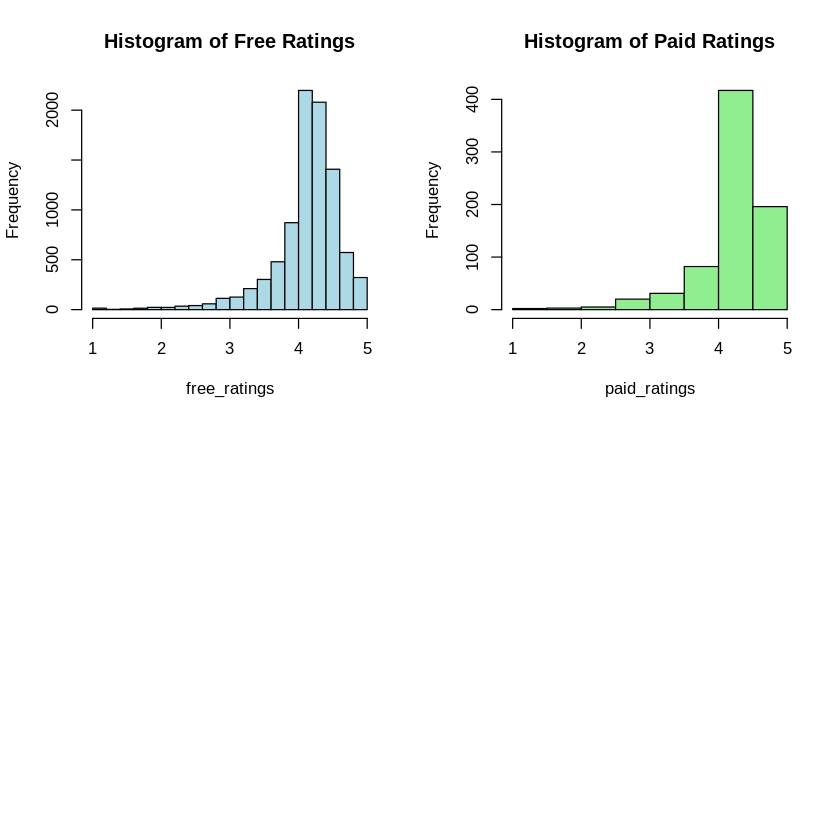

In [ ]:
# Create two groups based on the 'Type' column (free and paid)
free_ratings <- apps_df[apps_df$Type == 'Free', 'Rating']
paid_ratings <- apps_df[apps_df$Type == 'Paid', 'Rating']

# Visual inspection of normality using histograms
par(mfrow=c(2,2))  # Create a 2x2 layout for multiple plots
hist(free_ratings, main='Histogram of Free Ratings', col='lightblue')
hist(paid_ratings, main='Histogram of Paid Ratings', col='lightgreen')

**As the visual shows, the distributions of free and paid ratings are not normal, so t-test cann't be applied**



In [ ]:
# perform a Wilcoxon rank-sum test
wilcox_test_result <- wilcox.test(free_ratings, paid_ratings)
print(wilcox_test_result)


	Wilcoxon rank sum test with continuity correction

data:  free_ratings and paid_ratings
W = 2903348, p-value = 3.115e-10
alternative hypothesis: true location shift is not equal to 0



**Result analysis:** since the p-value is less than 0.05, we reject the null hypothesis.

## Part 4 : Correlation Between App Installs and Other Parameters

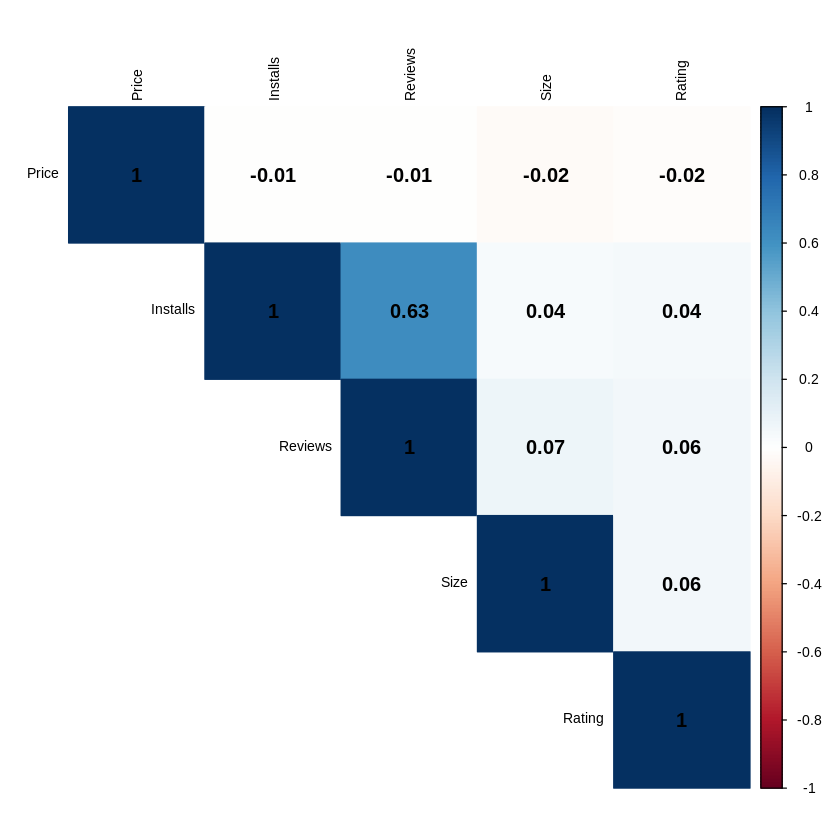

In [ ]:
# Create vectors of column that i want to show the correlations between them
vars <- c("Installs", "Size", "Price", "Reviews", "Rating")

# Extract the relevant columns from the data frame
data_to_correlate <- apps_df[, vars]

# Calculate the correlation matrix
correlation_matrix <- cor(data_to_correlate)

# Customize the color scale and other options as needed
corrplot(correlation_matrix, method = "color", type = "upper", order = "hclust", tl.cex = 0.7, tl.col = "black", cl.cex = 0.7, addCoef.col = "black")